In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/siddharthnayak/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [17]:
lr=1e-2
steps=30000
batch_size=256
display_step = 1000
examples_to_show = 10


In [4]:
# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

In [5]:
X=tf.placeholder(shape=(None,784),dtype=tf.float32,name='Input')

In [6]:
weights={'encoder_h1':tf.Variable(tf.random_normal([num_input,num_hidden_1]),name='encoder_h1'),
         'encoder_h2':tf.Variable(tf.random_normal([num_hidden_1,num_hidden_2]),name='encoder_h2'),
         'decoder_h1':tf.Variable(tf.random_normal([num_hidden_2,num_hidden_1]),name='decoder_h1'),
         'decoder_h2':tf.Variable(tf.random_normal([num_hidden_1,num_input]),name='decoder_h2')
}

In [7]:
biases={'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1]),name='encoder_b1'),
        'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2]),name='encoder_b2'),
        'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1]),name='decoder_b1'),
        'decoder_b2': tf.Variable(tf.random_normal([num_input]),name='decoder_b2'),
}


In [8]:
W_enc_1_hist=tf.summary.histogram('weights_enc_1',weights['encoder_h1'])
W_enc_2_hist=tf.summary.histogram('weights_enc_2',weights['encoder_h2'])

W_dec_1_hist=tf.summary.histogram('weights_dec_1',weights['decoder_h1'])
W_dec_2_hist=tf.summary.histogram('weights_dec_2',weights['decoder_h2'])

b_enc_1_hist=tf.summary.histogram('Bias_enc_1',biases['encoder_b1'])
b_enc_2_hist=tf.summary.histogram('Bias_enc_2',biases['encoder_b2'])

b_dec_1_hist=tf.summary.histogram('Bias_dec_1',biases['decoder_b1'])
b_dec_2_hist=tf.summary.histogram('Bias_dec_2',biases['decoder_b2'])

In [9]:
def encoder(x):
    layer1=tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_h1']),biases['encoder_b1']))
    layer2=tf.nn.sigmoid(tf.add(tf.matmul(layer1,weights['encoder_h2']),biases['encoder_b2']))
    return layer2

In [10]:
def decoder(x):
    layer1=tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_h1']),biases['decoder_b1']))
    layer2=tf.nn.sigmoid(tf.add(tf.matmul(layer1,weights['decoder_h2']),biases['decoder_b2']))
    return layer2

In [11]:
encoder_op=encoder(X)
decoder_op=decoder(encoder_op)

y_pred=decoder_op
y_true=X

In [12]:
with tf.name_scope('Cost_function') as scope:
    loss=tf.reduce_mean(tf.pow((y_pred-y_true),2))
    tf.summary.scalar('loss',loss)

In [13]:
with tf.name_scope('Optimizer') as scope:
    optimizer = tf.train.RMSPropOptimizer(learning_rate=lr).minimize(loss)

In [14]:
init = tf.global_variables_initializer()
merged_summary_op=tf.summary.merge_all()

# The graph/architecture

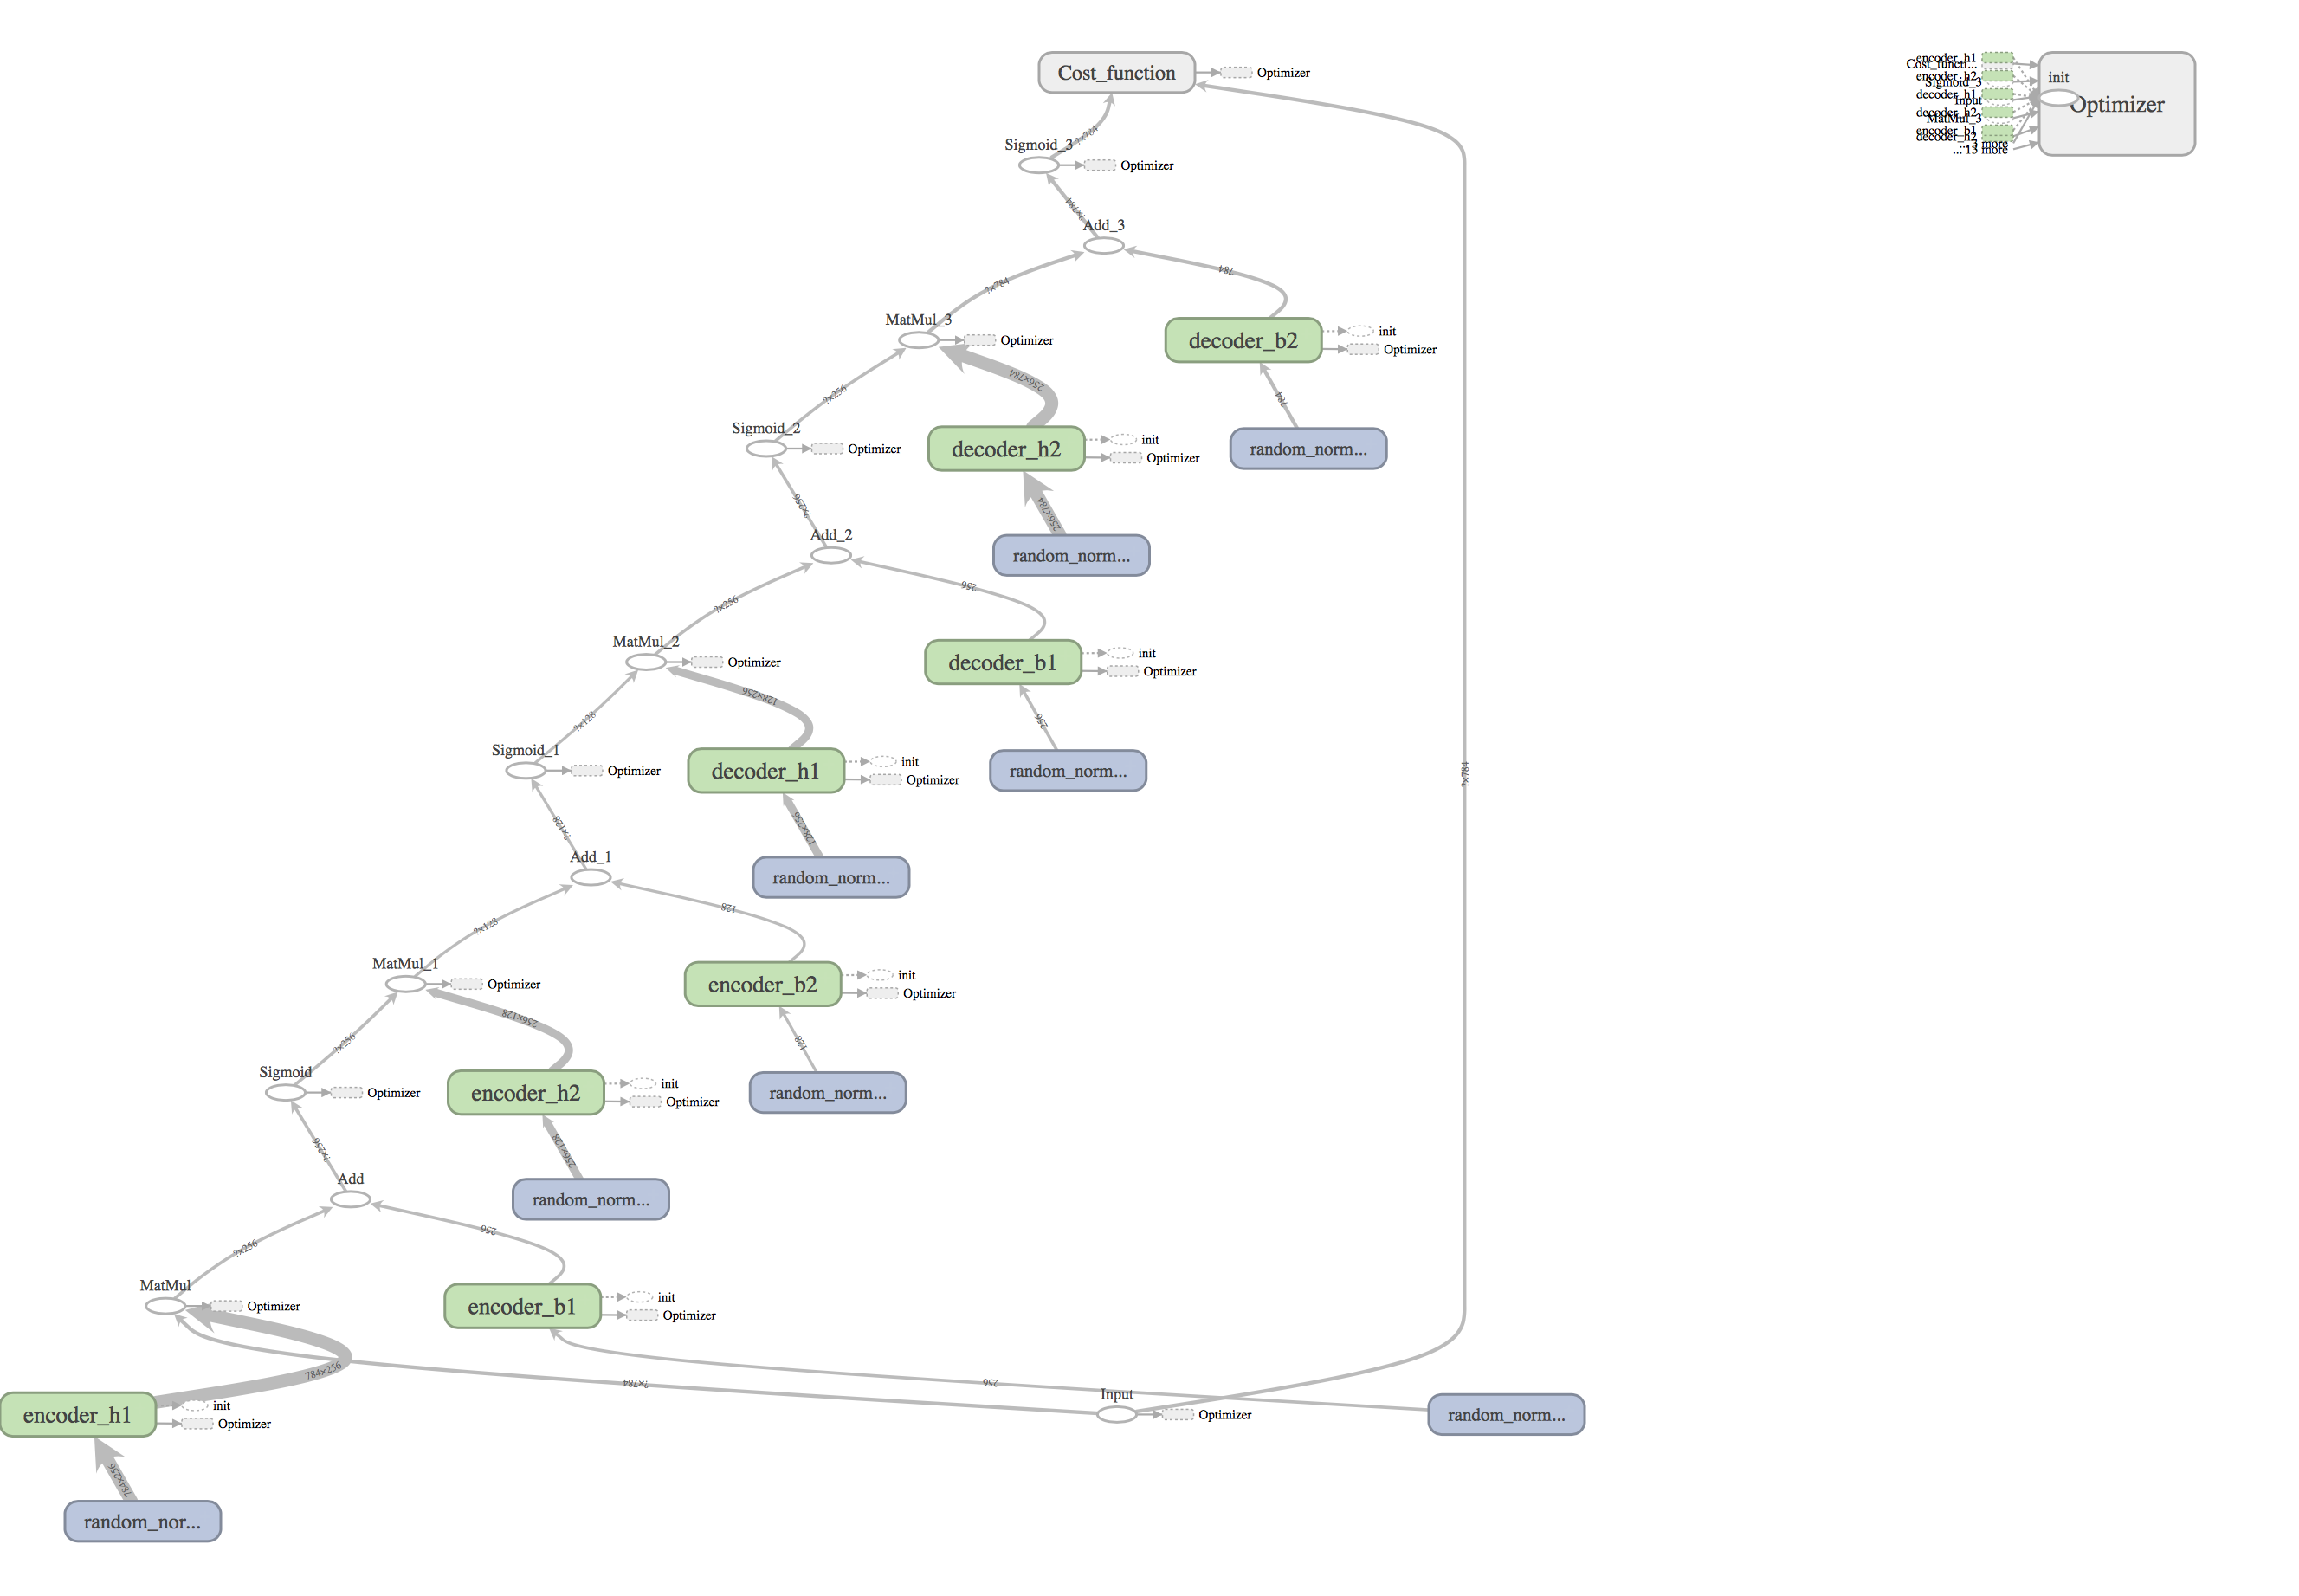

In [19]:
from IPython.display import Image
Image('/Users/siddharthnayak/Downloads/graph?large_attrs_key=_too_large_attrs&limit_attr_size=1024&run=.png')

Step 1: Minibatch Loss: 0.454523
Step 1000: Minibatch Loss: 0.140657
Step 2000: Minibatch Loss: 0.123303
Step 3000: Minibatch Loss: 0.115051
Step 4000: Minibatch Loss: 0.106444
Step 5000: Minibatch Loss: 0.108253
Step 6000: Minibatch Loss: 0.103647
Step 7000: Minibatch Loss: 0.101905
Step 8000: Minibatch Loss: 0.099776
Step 9000: Minibatch Loss: 0.094969
Step 10000: Minibatch Loss: 0.091278
Step 11000: Minibatch Loss: 0.087853
Step 12000: Minibatch Loss: 0.086202
Step 13000: Minibatch Loss: 0.085104
Step 14000: Minibatch Loss: 0.085432
Step 15000: Minibatch Loss: 0.083086
Step 16000: Minibatch Loss: 0.081098
Step 17000: Minibatch Loss: 0.080831
Step 18000: Minibatch Loss: 0.080305
Step 19000: Minibatch Loss: 0.079302
Step 20000: Minibatch Loss: 0.080732
Step 21000: Minibatch Loss: 0.076714
Step 22000: Minibatch Loss: 0.076143
Step 23000: Minibatch Loss: 0.074545
Step 24000: Minibatch Loss: 0.071053
Step 25000: Minibatch Loss: 0.071029
Step 26000: Minibatch Loss: 0.068852
Step 27000: Mi

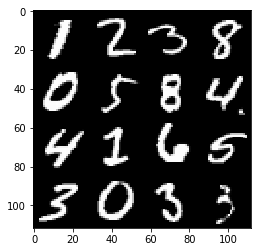

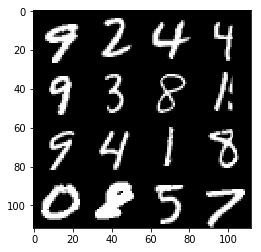

Reconstructed Images


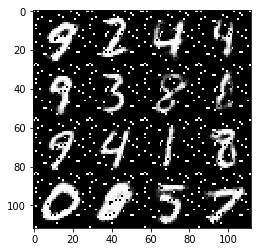

In [18]:
with tf.Session() as sess:
    sess.run(init)
    summary_writer=tf.summary.FileWriter('/Users/siddharthnayak/Downloads/logs',graph=sess.graph)
    for i in range(1,steps+1):
        batch_x, _ = mnist.train.next_batch(batch_size)
        _,l=sess.run([optimizer,loss],feed_dict={X:batch_x})
        
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))
            
        summary_str=sess.run(merged_summary_op,feed_dict={X:batch_x})
        summary_writer.add_summary(summary_str,i)
    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.savefig('Original.png')
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.savefig('Reconstructed.png')
    plt.show()
    
#sess.close()

# The cost function as a function of number of steps

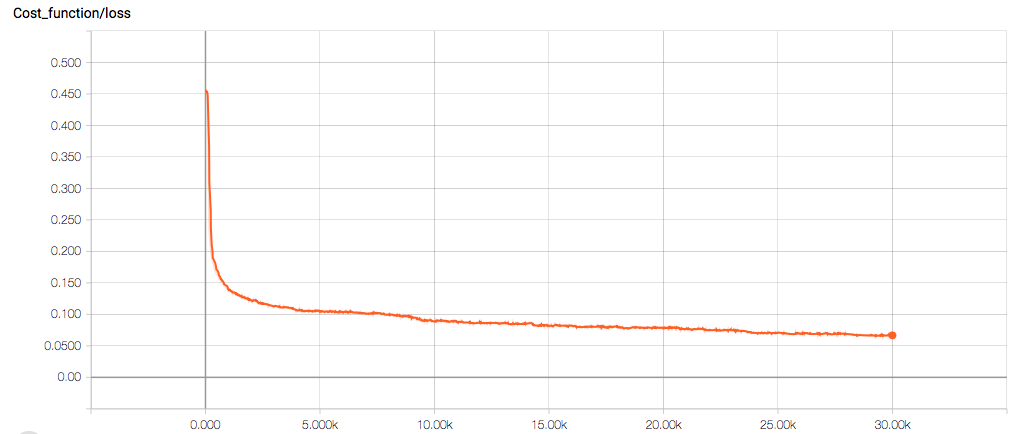

In [21]:
from IPython.display import Image
Image('/Users/siddharthnayak/Desktop/cost.png')